In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

# %pip install pydotplus  #First time you run this code
import pydotplus
from IPython.display import Image
from sklearn import tree



In [2]:
# Data that Yeongjin scraped from the Polygon.io API
# I'm going to delete the 5D, 3D,and 1D changes. These use today's data and would bias the model.
df = pd.read_csv('df_final.csv')
df.head()


,Timestamp,SPY Opening Price,QQQ Opening Price,VXX Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY 5D Avg Volume,...,QQQ 1D Stock Change,VXX 5D Stock Change,VXX 3D Stock Change,VXX 1D Stock Change,DIA 5D Stock Change,DIA 3D Stock Change,DIA 1D Stock Change,SPY Strike,SPY Open CC,SPY Close CC
0,2022-01-03,477.26,399.85,72.56,364.79,477.38,401.6800,71.76,365.24,55624228.0,...,0,-0.08,-0.04,0,0.01,0.00,0,478,-1.0,-1.0
1,2022-01-04,479.11,402.13,71.04,367.08,477.17,394.8700,71.48,368.26,58796150.8,...,0,-0.08,-0.04,0,0.00,0.00,0,480,-1.0,-1.0
2,2022-01-05,477.09,394.92,71.88,367.94,471.11,386.9400,74.90,365.38,63615369.4,...,0,-0.07,-0.04,0,0.00,0.00,0,478,-1.0,-1.0
3,2022-01-06,468.35,382.37,77.08,364.96,468.99,385.0000,76.48,362.84,73696064.6,...,0,0.01,0.03,0,0.00,0.00,0,469,-1.0,-1.0
4,2022-01-07,466.42,381.16,77.60,361.70,467.11,380.5707,75.48,363.34,79929956.4,...,0,0.02,0.08,0,0.00,-0.01,0,467,-1.0,-1.0


In [3]:
# Change the Timestamp variable to the datetime64[ns] format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

,Timestamp,SPY Opening Price,QQQ Opening Price,VXX Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY 5D Avg Volume,...,QQQ 1D Stock Change,VXX 5D Stock Change,VXX 3D Stock Change,VXX 1D Stock Change,DIA 5D Stock Change,DIA 3D Stock Change,DIA 1D Stock Change,SPY Strike,SPY Open CC,SPY Close CC
0,2022-01-03,477.26,399.850,72.560,364.79,477.3800,401.6800,71.760,365.24,55624228.0,...,0,-0.08,-0.04,0,0.01,0.00,0,478,-1.00,-1.00
1,2022-01-04,479.11,402.130,71.040,367.08,477.1700,394.8700,71.480,368.26,58796150.8,...,0,-0.08,-0.04,0,0.00,0.00,0,480,-1.00,-1.00
2,2022-01-05,477.09,394.920,71.880,367.94,471.1100,386.9400,74.900,365.38,63615369.4,...,0,-0.07,-0.04,0,0.00,0.00,0,478,-1.00,-1.00
3,2022-01-06,468.35,382.370,77.080,364.96,468.9900,385.0000,76.480,362.84,73696064.6,...,0,0.01,0.03,0,0.00,0.00,0,469,-1.00,-1.00
4,2022-01-07,466.42,381.160,77.600,361.70,467.1100,380.5707,75.480,363.34,79929956.4,...,0,0.02,0.08,0,0.00,-0.01,0,467,-1.00,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2024-03-14,516.64,441.165,13.390,391.65,512.7450,437.0000,14.100,388.46,67140546.0,...,0,-0.03,-0.07,0,0.01,0.01,0,517,0.87,0.01
492,2024-03-15,510.19,435.020,13.982,388.19,509.4451,434.0599,14.100,386.64,77442633.0,...,0,0.01,0.01,0,0.00,0.00,0,511,0.93,0.11
493,2024-03-18,514.26,439.480,13.880,387.72,513.6400,438.5250,13.750,388.17,81665385.4,...,0,-0.03,0.04,0,-0.00,-0.01,0,515,0.86,0.16
494,2024-03-19,511.27,433.914,13.850,387.72,515.0200,438.0500,13.510,390.56,86959112.2,...,0,-0.02,-0.02,0,0.00,-0.00,0,512,0.74,3.63


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            496 non-null    datetime64[ns]
 1   SPY Opening Price    496 non-null    float64       
 2   QQQ Opening Price    496 non-null    float64       
 3   VXX Opening Price    496 non-null    float64       
 4   DIA Opening Price    496 non-null    float64       
 5   SPY Closing Price    496 non-null    float64       
 6   QQQ Closing Price    496 non-null    float64       
 7   VXX Closing Price    496 non-null    float64       
 8   DIA Closing Price    496 non-null    float64       
 9   SPY 5D Avg Volume    496 non-null    float64       
 10  SPY 3D Avg Volume    496 non-null    float64       
 11  SPY 1D Avg Volume    496 non-null    float64       
 12  QQQ 5D Avg Volume    496 non-null    float64       
 13  QQQ 3D Avg Volume    496 non-null  

In [5]:
# make a new column for the SPY closing price. This will be used to make our target column.
# All of the other closing prices will be shifted so that we use yesterday's closing prices.
# If we used today's closing prices, that would give the model some information about how today's market turns out.
df['SPY_Close_y'] = df['SPY Closing Price']

In [6]:
# Sets up our data base.

df = df[['Timestamp' , 'SPY Opening Price' , 'VXX Opening Price' , 'QQQ Opening Price' ,\
        'DIA Opening Price' , 'SPY Closing Price' , 'QQQ Closing Price' , 'VXX Closing Price' , \
       'DIA Closing Price' , 'SPY Strike' , 'SPY Open CC' , 'SPY Close CC' , 'SPY_Close_y']]
df


,Timestamp,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,SPY Close CC,SPY_Close_y
0,2022-01-03,477.26,72.560,399.850,364.79,477.3800,401.6800,71.760,365.24,478,-1.00,-1.00,477.3800
1,2022-01-04,479.11,71.040,402.130,367.08,477.1700,394.8700,71.480,368.26,480,-1.00,-1.00,477.1700
2,2022-01-05,477.09,71.880,394.920,367.94,471.1100,386.9400,74.900,365.38,478,-1.00,-1.00,471.1100
3,2022-01-06,468.35,77.080,382.370,364.96,468.9900,385.0000,76.480,362.84,469,-1.00,-1.00,468.9900
4,2022-01-07,466.42,77.600,381.160,361.70,467.1100,380.5707,75.480,363.34,467,-1.00,-1.00,467.1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2024-03-14,516.64,13.390,441.165,391.65,512.7450,437.0000,14.100,388.46,517,0.87,0.01,512.7450
492,2024-03-15,510.19,13.982,435.020,388.19,509.4451,434.0599,14.100,386.64,511,0.93,0.11,509.4451
493,2024-03-18,514.26,13.880,439.480,387.72,513.6400,438.5250,13.750,388.17,515,0.86,0.16,513.6400
494,2024-03-19,511.27,13.850,433.914,387.72,515.0200,438.0500,13.510,390.56,512,0.74,3.63,515.0200


In [7]:
# Trim the data file so that we have the covered call prices. The API will only go back 2 years.
#start_date = '2022-04-06'
#end_date = '2024-03-20'
df = df[(df['Timestamp'] >= '2022-04-06') & (df['Timestamp'] <= '2024-03-20')]
df

,Timestamp,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,SPY Close CC,SPY_Close_y
59,2022-04-06,446.12,104.460,354.810,343.34,446.5500,353.7000,97.400,344.73,447,1.24,1.21,446.5500
60,2022-04-07,446.02,96.720,353.660,343.34,449.6000,355.0900,96.200,346.39,447,0.00,0.00,449.6000
61,2022-04-08,447.07,96.680,350.260,345.65,447.7700,349.2800,98.480,347.51,448,0.95,1.02,447.7700
62,2022-04-11,443.24,99.000,343.560,345.64,440.0000,341.0000,101.840,343.22,444,1.06,0.02,440.0000
63,2022-04-12,442.40,100.080,343.685,344.32,437.3700,338.9400,102.200,341.59,443,0.00,0.00,437.3700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2024-03-14,516.64,13.390,441.165,391.65,512.7450,437.0000,14.100,388.46,517,0.87,0.01,512.7450
492,2024-03-15,510.19,13.982,435.020,388.19,509.4451,434.0599,14.100,386.64,511,0.93,0.11,509.4451
493,2024-03-18,514.26,13.880,439.480,387.72,513.6400,438.5250,13.750,388.17,515,0.86,0.16,513.6400
494,2024-03-19,511.27,13.850,433.914,387.72,515.0200,438.0500,13.510,390.56,512,0.74,3.63,515.0200


In [8]:
# Need to correct the SPY CC closing price
# Sometimes the SPY Call closing price is innacurate because no one is trading it 
# Usually because the call is worthless at the end of the day.

# Iterate over rows
for index, row in df.iterrows():
    if row['SPY Closing Price'] > row['SPY Strike'] and row['SPY Open CC'] > 0:
        df.at[index, 'SPY Close CC'] = row['SPY Closing Price'] - row['SPY Strike']
    else:
        df.at[index, 'SPY Close CC'] = 0
    
df

,Timestamp,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,SPY Close CC,SPY_Close_y
59,2022-04-06,446.12,104.460,354.810,343.34,446.5500,353.7000,97.400,344.73,447,1.24,0.00,446.5500
60,2022-04-07,446.02,96.720,353.660,343.34,449.6000,355.0900,96.200,346.39,447,0.00,0.00,449.6000
61,2022-04-08,447.07,96.680,350.260,345.65,447.7700,349.2800,98.480,347.51,448,0.95,0.00,447.7700
62,2022-04-11,443.24,99.000,343.560,345.64,440.0000,341.0000,101.840,343.22,444,1.06,0.00,440.0000
63,2022-04-12,442.40,100.080,343.685,344.32,437.3700,338.9400,102.200,341.59,443,0.00,0.00,437.3700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2024-03-14,516.64,13.390,441.165,391.65,512.7450,437.0000,14.100,388.46,517,0.87,0.00,512.7450
492,2024-03-15,510.19,13.982,435.020,388.19,509.4451,434.0599,14.100,386.64,511,0.93,0.00,509.4451
493,2024-03-18,514.26,13.880,439.480,387.72,513.6400,438.5250,13.750,388.17,515,0.86,0.00,513.6400
494,2024-03-19,511.27,13.850,433.914,387.72,515.0200,438.0500,13.510,390.56,512,0.74,3.02,515.0200


In [9]:
# Adding a column that has day of week - Monday, Tuesday, etc.
# Need this to show that we can "fix" the data

# df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# df['day_of_week'] = df['Timestamp'].dt.day_name()  
# df

# _______________________________________________________________________


In [10]:
# Determine the net gain using the covered call algorithm 
df['net_gain'] = df['SPY Closing Price'] - df['SPY Opening Price'] + df['SPY Open CC'] - df['SPY Close CC']
df

/var/folders/2s/f93p50997jv25r58r7_glvy00000gn/T/ipykernel_6291/2714674818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['net_gain'] = df['SPY Closing Price'] - df['SPY Opening Price'] + df['SPY Open CC'] - df['SPY Close CC']


,Timestamp,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,SPY Close CC,SPY_Close_y,net_gain
59,2022-04-06,446.12,104.460,354.810,343.34,446.5500,353.7000,97.400,344.73,447,1.24,0.00,446.5500,1.6700
60,2022-04-07,446.02,96.720,353.660,343.34,449.6000,355.0900,96.200,346.39,447,0.00,0.00,449.6000,3.5800
61,2022-04-08,447.07,96.680,350.260,345.65,447.7700,349.2800,98.480,347.51,448,0.95,0.00,447.7700,1.6500
62,2022-04-11,443.24,99.000,343.560,345.64,440.0000,341.0000,101.840,343.22,444,1.06,0.00,440.0000,-2.1800
63,2022-04-12,442.40,100.080,343.685,344.32,437.3700,338.9400,102.200,341.59,443,0.00,0.00,437.3700,-5.0300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2024-03-14,516.64,13.390,441.165,391.65,512.7450,437.0000,14.100,388.46,517,0.87,0.00,512.7450,-3.0250
492,2024-03-15,510.19,13.982,435.020,388.19,509.4451,434.0599,14.100,386.64,511,0.93,0.00,509.4451,0.1851
493,2024-03-18,514.26,13.880,439.480,387.72,513.6400,438.5250,13.750,388.17,515,0.86,0.00,513.6400,0.2400
494,2024-03-19,511.27,13.850,433.914,387.72,515.0200,438.0500,13.510,390.56,512,0.74,3.02,515.0200,1.4700


In [11]:
df['net_gain'].sum()


107.52049999999937

In [12]:
CC_gain = df['SPY Open CC'].sum() - df['SPY Close CC'].sum()
CC_gain

14.904299999999978

In [13]:
# Create a bear market data file named df_bear
start_date = '2022-01-03'
end_date = '2022-10-07'
df_bear = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] <= end_date)]
df_bear

,Timestamp,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,SPY Close CC,SPY_Close_y,net_gain
59,2022-04-06,446.12,104.46,354.810,343.3400,446.55,353.7000,97.40,344.73,447,1.24,0.00,446.55,1.67
60,2022-04-07,446.02,96.72,353.660,343.3400,449.60,355.0900,96.20,346.39,447,0.00,0.00,449.60,3.58
61,2022-04-08,447.07,96.68,350.260,345.6500,447.77,349.2800,98.48,347.51,448,0.95,0.00,447.77,1.65
62,2022-04-11,443.24,99.00,343.560,345.6400,440.00,341.0000,101.84,343.22,444,1.06,0.00,440.00,-2.18
63,2022-04-12,442.40,100.08,343.685,344.3200,437.37,338.9400,102.20,341.59,443,0.00,0.00,437.37,-5.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2022-10-03,359.67,82.12,267.980,289.6700,366.90,274.0200,80.26,295.09,360,1.68,6.90,366.90,2.01
183,2022-10-04,373.47,76.92,279.620,299.4200,376.59,281.1500,77.84,302.23,374,0.00,0.00,376.59,3.12
184,2022-10-05,373.77,78.42,278.200,300.2400,377.88,282.7200,77.96,303.44,374,1.60,3.88,377.88,1.83
185,2022-10-06,376.16,77.16,282.170,301.5500,373.46,279.9000,80.16,299.36,377,0.00,0.00,373.46,-2.70


In [14]:
df_bear['net_gain'].sum()

5.718599999999796

In [15]:
# Create a bull market data file named df_bull
start_date = '2022-10-07'
end_date = '2024-03-20'
df_bull = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] <= end_date)]
df_bull

,Timestamp,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,SPY Close CC,SPY_Close_y,net_gain
186,2022-10-07,367.87,81.300,274.170,295.7253,361.9900,268.4301,83.520,292.38,368,1.41,0.00,361.9900,-4.4700
187,2022-10-10,362.49,84.600,267.200,293.9800,360.7024,266.7500,84.780,292.65,363,1.47,0.00,360.7024,-0.3176
188,2022-10-11,357.21,86.400,263.540,290.9600,357.0800,262.2900,86.320,292.28,358,0.00,0.00,357.0800,-0.1300
189,2022-10-12,356.86,86.160,262.500,291.7500,357.4700,263.2000,85.520,292.88,357,2.61,0.47,357.4700,2.7500
190,2022-10-13,348.53,87.040,254.480,286.7600,365.8100,268.7300,83.760,300.44,349,0.00,0.00,365.8100,17.2800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2024-03-14,516.64,13.390,441.165,391.6500,512.7450,437.0000,14.100,388.46,517,0.87,0.00,512.7450,-3.0250
492,2024-03-15,510.19,13.982,435.020,388.1900,509.4451,434.0599,14.100,386.64,511,0.93,0.00,509.4451,0.1851
493,2024-03-18,514.26,13.880,439.480,387.7200,513.6400,438.5250,13.750,388.17,515,0.86,0.00,513.6400,0.2400
494,2024-03-19,511.27,13.850,433.914,387.7200,515.0200,438.0500,13.510,390.56,512,0.74,3.02,515.0200,1.4700


In [16]:
df_bull['net_gain'].sum()

97.33189999999959

In [17]:
# We no longer need the Timestamp (none of the models can use this data anyway)
df = df.drop(columns='Timestamp')
df

,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,SPY Close CC,SPY_Close_y,net_gain
59,446.12,104.460,354.810,343.34,446.5500,353.7000,97.400,344.73,447,1.24,0.00,446.5500,1.6700
60,446.02,96.720,353.660,343.34,449.6000,355.0900,96.200,346.39,447,0.00,0.00,449.6000,3.5800
61,447.07,96.680,350.260,345.65,447.7700,349.2800,98.480,347.51,448,0.95,0.00,447.7700,1.6500
62,443.24,99.000,343.560,345.64,440.0000,341.0000,101.840,343.22,444,1.06,0.00,440.0000,-2.1800
63,442.40,100.080,343.685,344.32,437.3700,338.9400,102.200,341.59,443,0.00,0.00,437.3700,-5.0300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,516.64,13.390,441.165,391.65,512.7450,437.0000,14.100,388.46,517,0.87,0.00,512.7450,-3.0250
492,510.19,13.982,435.020,388.19,509.4451,434.0599,14.100,386.64,511,0.93,0.00,509.4451,0.1851
493,514.26,13.880,439.480,387.72,513.6400,438.5250,13.750,388.17,515,0.86,0.00,513.6400,0.2400
494,511.27,13.850,433.914,387.72,515.0200,438.0500,13.510,390.56,512,0.74,3.02,515.0200,1.4700


In [18]:
# Shift the Index prices by one day so that we are using yesterday's data.
df['SPY Closing Price'] = df['SPY Closing Price'].shift(1)
df['QQQ Closing Price'] = df['QQQ Closing Price'].shift(1)
df['VXX Closing Price'] = df['VXX Closing Price'].shift(1)
df['DIA Closing Price'] = df['DIA Closing Price'].shift(1)
df

,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,SPY Close CC,SPY_Close_y,net_gain
59,446.12,104.460,354.810,343.34,NaN,NaN,NaN,NaN,447,1.24,0.00,446.5500,1.6700
60,446.02,96.720,353.660,343.34,446.5500,353.7000,97.4000,344.73,447,0.00,0.00,449.6000,3.5800
61,447.07,96.680,350.260,345.65,449.6000,355.0900,96.2000,346.39,448,0.95,0.00,447.7700,1.6500
62,443.24,99.000,343.560,345.64,447.7700,349.2800,98.4800,347.51,444,1.06,0.00,440.0000,-2.1800
63,442.40,100.080,343.685,344.32,440.0000,341.0000,101.8400,343.22,443,0.00,0.00,437.3700,-5.0300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,516.64,13.390,441.165,391.65,515.7100,439.9700,13.5703,391.11,517,0.87,0.00,512.7450,-3.0250
492,510.19,13.982,435.020,388.19,512.7450,437.0000,14.1000,388.46,511,0.93,0.00,509.4451,0.1851
493,514.26,13.880,439.480,387.72,509.4451,434.0599,14.1000,386.64,515,0.86,0.00,513.6400,0.2400
494,511.27,13.850,433.914,387.72,513.6400,438.5250,13.7500,388.17,512,0.74,3.02,515.0200,1.4700


In [19]:
# Create the 5 day, 3 day, and 1 day changes for the different indexes
df['SPY_5d_change'] = df['SPY Opening Price'].rolling(window=6, min_periods=6).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['SPY_3d_change'] = df['SPY Opening Price'].rolling(window=4, min_periods=4).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['SPY_1d_change'] = df['SPY Opening Price'].rolling(window=2, min_periods=2).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['VXX_5d_change'] = df['VXX Opening Price'].rolling(window=6, min_periods=6).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['VXX_3d_change'] = df['VXX Opening Price'].rolling(window=4, min_periods=4).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['VXX_1d_change'] = df['VXX Opening Price'].rolling(window=2, min_periods=2).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['QQQ_5d_change'] = df['QQQ Opening Price'].rolling(window=6, min_periods=6).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['QQQ_3d_change'] = df['QQQ Opening Price'].rolling(window=4, min_periods=4).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['QQQ_1d_change'] = df['QQQ Opening Price'].rolling(window=2, min_periods=2).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['DIA_5d_change'] = df['DIA Opening Price'].rolling(window=6, min_periods=6).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['DIA_3d_change'] = df['DIA Opening Price'].rolling(window=4, min_periods=4).apply(lambda x: x.iloc[-1] - x.iloc[0])
df['DIA_1d_change'] = df['DIA Opening Price'].rolling(window=2, min_periods=2).apply(lambda x: x.iloc[-1] - x.iloc[0])
df


,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,...,SPY_1d_change,VXX_5d_change,VXX_3d_change,VXX_1d_change,QQQ_5d_change,QQQ_3d_change,QQQ_1d_change,DIA_5d_change,DIA_3d_change,DIA_1d_change
59,446.12,104.460,354.810,343.34,NaN,NaN,NaN,NaN,447,1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,446.02,96.720,353.660,343.34,446.5500,353.7000,97.4000,344.73,447,0.00,...,-0.10,NaN,NaN,-7.740,NaN,NaN,-1.150,NaN,NaN,0.00
61,447.07,96.680,350.260,345.65,449.6000,355.0900,96.2000,346.39,448,0.95,...,1.05,NaN,NaN,-0.040,NaN,NaN,-3.400,NaN,NaN,2.31
62,443.24,99.000,343.560,345.64,447.7700,349.2800,98.4800,347.51,444,1.06,...,-3.83,NaN,-5.460,2.320,NaN,-11.250,-6.700,NaN,2.300,-0.01
63,442.40,100.080,343.685,344.32,440.0000,341.0000,101.8400,343.22,443,0.00,...,-0.84,NaN,3.360,1.080,NaN,-9.975,0.125,NaN,0.980,-1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,516.64,13.390,441.165,391.65,515.7100,439.9700,13.5703,391.11,517,0.87,...,0.21,-0.590,-1.190,-0.150,-0.355,5.315,-0.275,3.370,4.765,0.67
492,510.19,13.982,435.020,388.19,512.7450,437.0000,14.1000,388.46,511,0.93,...,-6.45,0.082,0.022,0.592,-10.380,-2.580,-6.145,0.110,0.250,-3.46
493,514.26,13.880,439.480,387.72,509.4451,434.0599,14.1000,386.64,515,0.86,...,4.07,-0.700,0.340,-0.102,3.630,-1.960,4.460,0.835,-3.260,-0.47
494,511.27,13.850,433.914,387.72,513.6400,438.5250,13.7500,388.17,512,0.74,...,-2.99,-0.110,0.460,-0.030,-3.686,-7.251,-5.566,-0.220,-3.930,0.00


In [20]:
# Drop the net-gain column. This will bias the model
df.drop(columns=['net_gain'], inplace=True)
# df.drop(index='index_label', inplace=True)

In [21]:
# Due to the 5D, 3D, and 1D rolling windows, some rows now have NaNs. Drop these.
df = df.dropna()
df

,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,...,SPY_1d_change,VXX_5d_change,VXX_3d_change,VXX_1d_change,QQQ_5d_change,QQQ_3d_change,QQQ_1d_change,DIA_5d_change,DIA_3d_change,DIA_1d_change
64,438.9916,101.7996,339.6400,342.44,437.3700,338.9400,102.2000,341.590,439,1.60,...,-3.4084,-2.6604,5.1196,1.7196,-15.1700,-10.6200,-4.0450,-0.900,-3.210,-1.88
65,443.6800,96.6200,345.1800,347.72,443.6850,346.8000,99.0000,345.800,444,0.80,...,4.6884,-0.1000,-2.3800,-5.1796,-8.4800,1.6200,5.5400,4.380,2.080,5.28
66,438.3900,99.8000,338.1908,345.40,438.6500,338.9800,99.8400,345.015,439,1.26,...,-5.2900,3.1200,-0.2800,3.1800,-12.0692,-5.4942,-6.9892,-0.250,1.080,-2.32
67,437.9700,100.3996,337.2500,344.74,435.7600,336.8600,101.6400,342.770,438,0.00,...,-0.4200,1.3996,-1.4000,0.5996,-6.3100,-2.3900,-0.9408,-0.900,2.300,-0.66
68,446.5100,97.2400,345.3700,351.85,444.4650,345.3500,98.0000,348.870,447,0.74,...,8.5400,-2.8400,0.6200,-3.1596,1.6850,0.1900,8.1200,7.530,4.130,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,516.6400,13.3900,441.1650,391.65,515.7100,439.9700,13.5703,391.110,517,0.87,...,0.2100,-0.5900,-1.1900,-0.1500,-0.3550,5.3150,-0.2750,3.370,4.765,0.67
492,510.1900,13.9820,435.0200,388.19,512.7450,437.0000,14.1000,388.460,511,0.93,...,-6.4500,0.0820,0.0220,0.5920,-10.3800,-2.5800,-6.1450,0.110,0.250,-3.46
493,514.2600,13.8800,439.4800,387.72,509.4451,434.0599,14.1000,386.640,515,0.86,...,4.0700,-0.7000,0.3400,-0.1020,3.6300,-1.9600,4.4600,0.835,-3.260,-0.47
494,511.2700,13.8500,433.9140,387.72,513.6400,438.5250,13.7500,388.170,512,0.74,...,-2.9900,-0.1100,0.4600,-0.0300,-3.6860,-7.2510,-5.5660,-0.220,-3.930,0.00


In [22]:
# Reset index to create a sequential number index

df.reset_index(drop=True, inplace=True)

# Show the modified DataFrame
df



,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,...,SPY_1d_change,VXX_5d_change,VXX_3d_change,VXX_1d_change,QQQ_5d_change,QQQ_3d_change,QQQ_1d_change,DIA_5d_change,DIA_3d_change,DIA_1d_change
0,438.9916,101.7996,339.6400,342.44,437.3700,338.9400,102.2000,341.590,439,1.60,...,-3.4084,-2.6604,5.1196,1.7196,-15.1700,-10.6200,-4.0450,-0.900,-3.210,-1.88
1,443.6800,96.6200,345.1800,347.72,443.6850,346.8000,99.0000,345.800,444,0.80,...,4.6884,-0.1000,-2.3800,-5.1796,-8.4800,1.6200,5.5400,4.380,2.080,5.28
2,438.3900,99.8000,338.1908,345.40,438.6500,338.9800,99.8400,345.015,439,1.26,...,-5.2900,3.1200,-0.2800,3.1800,-12.0692,-5.4942,-6.9892,-0.250,1.080,-2.32
3,437.9700,100.3996,337.2500,344.74,435.7600,336.8600,101.6400,342.770,438,0.00,...,-0.4200,1.3996,-1.4000,0.5996,-6.3100,-2.3900,-0.9408,-0.900,2.300,-0.66
4,446.5100,97.2400,345.3700,351.85,444.4650,345.3500,98.0000,348.870,447,0.74,...,8.5400,-2.8400,0.6200,-3.1596,1.6850,0.1900,8.1200,7.530,4.130,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,516.6400,13.3900,441.1650,391.65,515.7100,439.9700,13.5703,391.110,517,0.87,...,0.2100,-0.5900,-1.1900,-0.1500,-0.3550,5.3150,-0.2750,3.370,4.765,0.67
428,510.1900,13.9820,435.0200,388.19,512.7450,437.0000,14.1000,388.460,511,0.93,...,-6.4500,0.0820,0.0220,0.5920,-10.3800,-2.5800,-6.1450,0.110,0.250,-3.46
429,514.2600,13.8800,439.4800,387.72,509.4451,434.0599,14.1000,386.640,515,0.86,...,4.0700,-0.7000,0.3400,-0.1020,3.6300,-1.9600,4.4600,0.835,-3.260,-0.47
430,511.2700,13.8500,433.9140,387.72,513.6400,438.5250,13.7500,388.170,512,0.74,...,-2.9900,-0.1100,0.4600,-0.0300,-3.6860,-7.2510,-5.5660,-0.220,-3.930,0.00


In [23]:
# Feature engineering
# Create 'trade' column based on condition
# No trade if SPY close - SPY open > 0. We don't want to rent the Index. 
df['trade'] = np.where(df['SPY_Close_y'] - df['SPY Opening Price'] > 0, 0, 1)

# Show the DataFrame with the new 'trade' column
df

/var/folders/2s/f93p50997jv25r58r7_glvy00000gn/T/ipykernel_6291/2079789135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trade'] = np.where(df['SPY_Close_y'] - df['SPY Opening Price'] > 0, 0, 1)


,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,...,VXX_5d_change,VXX_3d_change,VXX_1d_change,QQQ_5d_change,QQQ_3d_change,QQQ_1d_change,DIA_5d_change,DIA_3d_change,DIA_1d_change,trade
0,438.9916,101.7996,339.6400,342.44,437.3700,338.9400,102.2000,341.590,439,1.60,...,-2.6604,5.1196,1.7196,-15.1700,-10.6200,-4.0450,-0.900,-3.210,-1.88,0
1,443.6800,96.6200,345.1800,347.72,443.6850,346.8000,99.0000,345.800,444,0.80,...,-0.1000,-2.3800,-5.1796,-8.4800,1.6200,5.5400,4.380,2.080,5.28,1
2,438.3900,99.8000,338.1908,345.40,438.6500,338.9800,99.8400,345.015,439,1.26,...,3.1200,-0.2800,3.1800,-12.0692,-5.4942,-6.9892,-0.250,1.080,-2.32,1
3,437.9700,100.3996,337.2500,344.74,435.7600,336.8600,101.6400,342.770,438,0.00,...,1.3996,-1.4000,0.5996,-6.3100,-2.3900,-0.9408,-0.900,2.300,-0.66,0
4,446.5100,97.2400,345.3700,351.85,444.4650,345.3500,98.0000,348.870,447,0.74,...,-2.8400,0.6200,-3.1596,1.6850,0.1900,8.1200,7.530,4.130,7.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,516.6400,13.3900,441.1650,391.65,515.7100,439.9700,13.5703,391.110,517,0.87,...,-0.5900,-1.1900,-0.1500,-0.3550,5.3150,-0.2750,3.370,4.765,0.67,1
428,510.1900,13.9820,435.0200,388.19,512.7450,437.0000,14.1000,388.460,511,0.93,...,0.0820,0.0220,0.5920,-10.3800,-2.5800,-6.1450,0.110,0.250,-3.46,1
429,514.2600,13.8800,439.4800,387.72,509.4451,434.0599,14.1000,386.640,515,0.86,...,-0.7000,0.3400,-0.1020,3.6300,-1.9600,4.4600,0.835,-3.260,-0.47,1
430,511.2700,13.8500,433.9140,387.72,513.6400,438.5250,13.7500,388.170,512,0.74,...,-0.1100,0.4600,-0.0300,-3.6860,-7.2510,-5.5660,-0.220,-3.930,0.00,0


In [24]:
# Last thing. Drop the SPY_Close_y column. That will bias the model. 
# We needed that column to determine the correct closing price for the calls 
# after we shifted all of the Index Closing prices.
df = df.drop(columns='SPY_Close_y')


In [25]:
print(df.columns)

Index(['SPY Opening Price', 'VXX Opening Price', 'QQQ Opening Price',
       'DIA Opening Price', 'SPY Closing Price', 'QQQ Closing Price',
       'VXX Closing Price', 'DIA Closing Price', 'SPY Strike', 'SPY Open CC',
       'SPY Close CC', 'SPY_5d_change', 'SPY_3d_change', 'SPY_1d_change',
       'VXX_5d_change', 'VXX_3d_change', 'VXX_1d_change', 'QQQ_5d_change',
       'QQQ_3d_change', 'QQQ_1d_change', 'DIA_5d_change', 'DIA_3d_change',
       'DIA_1d_change', 'trade'],
      dtype='object')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SPY Opening Price  432 non-null    float64
 1   VXX Opening Price  432 non-null    float64
 2   QQQ Opening Price  432 non-null    float64
 3   DIA Opening Price  432 non-null    float64
 4   SPY Closing Price  432 non-null    float64
 5   QQQ Closing Price  432 non-null    float64
 6   VXX Closing Price  432 non-null    float64
 7   DIA Closing Price  432 non-null    float64
 8   SPY Strike         432 non-null    int64  
 9   SPY Open CC        432 non-null    float64
 10  SPY Close CC       432 non-null    float64
 11  SPY_5d_change      432 non-null    float64
 12  SPY_3d_change      432 non-null    float64
 13  SPY_1d_change      432 non-null    float64
 14  VXX_5d_change      432 non-null    float64
 15  VXX_3d_change      432 non-null    float64
 16  VXX_1d_change      432 non

In [27]:
df['trade'].value_counts()

trade
0    232
1    200
Name: count, dtype: int64

In [28]:
X = df.copy()
X = df.drop(columns=['trade'])
y = df['trade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [29]:
# Encode the day_of_week column now
# mapping = [['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday']]
# ordinal_encoder = OrdinalEncoder(categories = [['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday']])
# ordinal_encoder.fit(X_train['day_of_week'].values.reshape(-1,1))
# value_counts = df['day_of_week'].value_counts()
# print(value_counts)

In [30]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
# Create the Support Vector Machine Classifier model with a 'poly' kernel
svm_model = SVC(kernel='poly')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [32]:
print(f'Training Data Score - train: {svm_model.score(X_train_scaled, y_train)}')
print(f'Testing Data Score - test: {svm_model.score(X_test_scaled, y_test)}')

Training Data Score - train: 0.8055555555555556
Testing Data Score - test: 0.6666666666666666


In [33]:
# Create the Support Vector Machine Classifier model with a 'linear' kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [34]:
print(f'Training Data Score - train: {svm_model.score(X_train_scaled, y_train)}')
print(f'Testing Data Score - test: {svm_model.score(X_test_scaled, y_test)}')

Training Data Score - train: 0.8518518518518519
Testing Data Score - test: 0.8240740740740741


In [35]:
logistic_regression_model = LogisticRegression(random_state=7, max_iter=500) 

logistic_regression_model.fit(X_train_scaled, y_train)
print(f'Training Data Score - train: {logistic_regression_model.score(X_train_scaled, y_train)}')
print(f'Testing Data Score - test: {logistic_regression_model.score(X_test_scaled, y_test)}')
      
# print(f 'Training Data Score - train: { logistic_regression_model.score(X_train, y_train)}’)
# print(f 'Testing Data Score - test: { logistic_regression_model.score(X_test, y_test)}’)

predictions = logistic_regression_model.predict(X_train)
results_df = pd.DataFrame({'Prediction': predictions, 'Actual': y_train})
results_df

Training Data Score - train: 0.8703703703703703
Testing Data Score - test: 0.8240740740740741


/Users/jrequarth/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Prediction,Actual
194,1,0
65,1,0
212,0,0
181,0,0
261,1,0
...,...,...
310,1,0
105,1,1
40,1,1
407,1,0


In [36]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [37]:
print(f'Training Data Score - train: {dt_model.score(X_train, y_train)}')
print(f'Testing Data Score - test: {dt_model.score(X_test, y_test)}')

Training Data Score - train: 0.5462962962962963
Testing Data Score - test: 0.5092592592592593


/Users/jrequarth/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/jrequarth/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [38]:
# Create the Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128, random_state=1)

In [39]:
print(f'Training Data Score - train: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Data Score - test: {rf_model.score(X_test_scaled, y_test)}')

Training Data Score - train: 1.0
Testing Data Score - test: 0.8703703703703703


In [40]:
# Determine values for max_depth
max_depths = range(1, 10)
models = {'train_score': [], 'test_score': [], 'max_depth': []}
for depth in max_depths:
    clf = RandomForestClassifier(max_depth = depth)
    clf.fit(X_train_scaled, y_train)
        
    train_pred = clf.predict(X_train_scaled)
    test_pred = clf.predict(X_test_scaled)
        
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)
        
    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['max_depth'].append(depth)
        
models_df = pd.DataFrame(models).set_index('max_depth')
    

In [41]:
models_df

,train_score,test_score
max_depth,,
1,0.824513,0.740309
2,0.918079,0.834991
3,0.920904,0.863293
4,0.949153,0.881475
5,0.960452,0.862607
6,0.966102,0.844425
7,0.985876,0.853516
8,0.997175,0.796913
9,0.997175,0.825557


<Axes: xlabel='max_depth'>

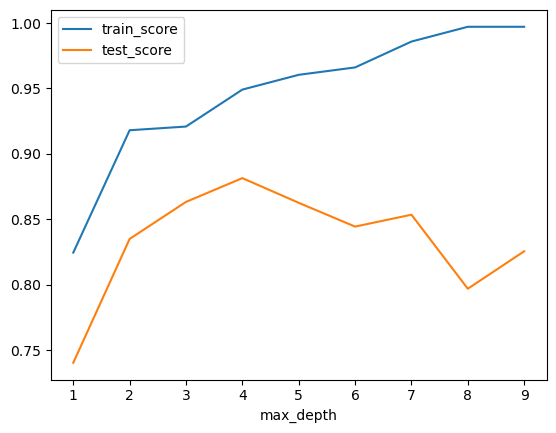

In [42]:
models_df.plot()

In [54]:
clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train_scaled, y_train)

train_pred = clf.predict(X_train_scaled)
test_pred = clf.predict(X_test_scaled)

print(balanced_accuracy_score(y_train, train_pred))
print(balanced_accuracy_score(y_test, test_pred))

0.9406779661016949
0.8538593481989709


In [44]:
#KNN
# Loop through different k values; only use odd numbers so that there is not a tie.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train_scaled, y_train)
 train_score = knn.score(X_train_scaled, y_train)
 test_score = knn.score(X_test_scaled, y_test)
 train_scores.append(train_score)
 test_scores.append(test_score)
 print(f'k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}')


k: 1, Train/Test Score: 1.000/0.639
k: 3, Train/Test Score: 0.806/0.574
k: 5, Train/Test Score: 0.775/0.602
k: 7, Train/Test Score: 0.765/0.630
k: 9, Train/Test Score: 0.741/0.593
k: 11, Train/Test Score: 0.716/0.630
k: 13, Train/Test Score: 0.691/0.620
k: 15, Train/Test Score: 0.701/0.620
k: 17, Train/Test Score: 0.716/0.630
k: 19, Train/Test Score: 0.713/0.630


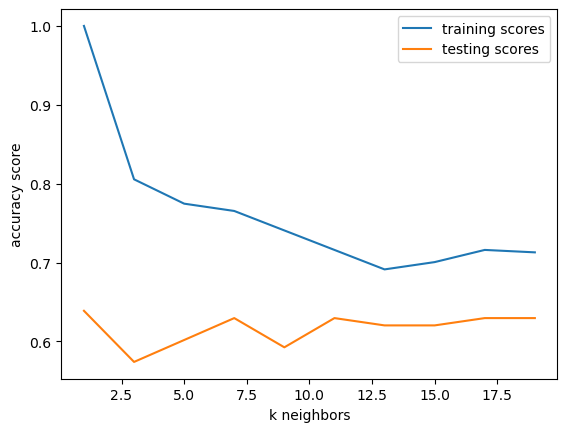

In [45]:
plt.plot(range(1, 20, 2), train_scores, label="training scores")
plt.plot(range(1, 20, 2), test_scores, label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [46]:
#Train the KNN model with the best k value
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [47]:
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
print(f'Training Data Score - train: {knn_model.score(X_train_scaled, y_train)}')
print(f'Testing Data Score - test: {knn_model.score(X_test_scaled, y_test)}')

k=13 Test Acc: 0.630
Training Data Score - train: 0.691358024691358
Testing Data Score - test: 0.6203703703703703


In [48]:
# Train Gradient Boosting Classifier
GBC_model = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train)
print(f'Training Data Score - train: {GBC_model.score(X_train_scaled, y_train)}')
print(f'Testing Data Score - test: {GBC_model.score(X_test_scaled, y_test)}')

Training Data Score - train: 0.9969135802469136
Testing Data Score - test: 0.8333333333333334


In [49]:
# Train AdaBoostClassifier
ABC_model = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
print(f'Training Data Score - train: {ABC_model.score(X_train_scaled, y_train)}')
print(f'Testing Data Score - test: {ABC_model.score(X_test_scaled, y_test)}')


Training Data Score - train: 0.9938271604938271
Testing Data Score - test: 0.8425925925925926


In [50]:
X_test['SPY Closing Price'] = X_test['SPY Closing Price'].shift(-1)
X_test.dropna(inplace=True)
X_test

,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,...,SPY_1d_change,VXX_5d_change,VXX_3d_change,VXX_1d_change,QQQ_5d_change,QQQ_3d_change,QQQ_1d_change,DIA_5d_change,DIA_3d_change,DIA_1d_change
167,379.1100,56.60,262.380,330.200,507.430,263.3700,57.420,331.9100,380,1.71,...,-4.6000,-2.0800,0.72,-0.6800,-6.3600,-9.13,-4.8200,2.610,-2.2300,-2.8500
417,508.4600,14.17,438.910,391.270,382.460,438.3800,14.290,390.4750,509,1.40,...,4.4600,-0.1000,-0.42,0.0000,4.4100,10.47,4.4900,5.750,6.4900,3.1400
136,383.2200,73.76,276.530,322.380,418.440,278.0316,75.160,318.7800,384,0.00,...,1.0200,-7.8000,-6.52,-2.7200,7.2200,1.99,-1.4150,18.080,9.2131,3.5900
258,419.5000,35.54,337.015,334.600,427.970,336.2300,35.795,334.0500,420,0.88,...,-0.5800,-1.6600,-1.01,1.0800,12.1050,8.92,-0.2450,2.290,2.7200,-0.7300
267,428.3952,31.19,355.170,337.740,403.308,354.5485,30.905,337.9550,429,0.81,...,2.7852,-4.7112,-3.70,-0.4600,14.3100,6.60,-0.0501,9.385,8.8900,3.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,516.4300,13.54,441.440,390.980,443.175,443.3821,13.600,390.8300,517,0.63,...,4.9600,-0.2800,-0.36,-0.4200,1.9700,-3.96,3.8400,3.290,2.9000,3.0400
339,442.6200,20.39,368.900,345.355,376.200,370.0800,20.470,345.9500,443,0.67,...,-0.6900,-0.3250,0.29,-0.2900,-6.4099,-6.19,-1.6200,-1.515,-2.6450,-0.8350
112,368.8200,77.08,276.160,296.890,420.180,281.7292,74.240,302.0100,369,1.81,...,-6.8800,-1.8720,4.04,1.8400,-10.1600,-11.87,-5.3700,-8.490,-9.9300,-3.8300
263,421.8600,34.43,352.150,330.000,435.190,348.4900,35.510,331.0100,422,0.95,...,6.2900,-1.1100,-2.94,-1.4712,15.1350,20.42,11.2900,-4.600,1.1097,1.6450


In [51]:
# Since the RandomForestClassifier (max_depth=5) is the best model, use it to predict whether we would sell CCs on
# a specific day in the X_train data frame
rf_model = RandomForestClassifier(max_depth=3)
rf_model.fit(X_train, y_train)
y_test_predicted = rf_model.predict(X_test)
X_test['y_test'] = y_test_predicted
X_test

,SPY Opening Price,VXX Opening Price,QQQ Opening Price,DIA Opening Price,SPY Closing Price,QQQ Closing Price,VXX Closing Price,DIA Closing Price,SPY Strike,SPY Open CC,...,VXX_5d_change,VXX_3d_change,VXX_1d_change,QQQ_5d_change,QQQ_3d_change,QQQ_1d_change,DIA_5d_change,DIA_3d_change,DIA_1d_change,y_test
167,379.1100,56.60,262.380,330.200,507.430,263.3700,57.420,331.9100,380,1.71,...,-2.0800,0.72,-0.6800,-6.3600,-9.13,-4.8200,2.610,-2.2300,-2.8500,0
417,508.4600,14.17,438.910,391.270,382.460,438.3800,14.290,390.4750,509,1.40,...,-0.1000,-0.42,0.0000,4.4100,10.47,4.4900,5.750,6.4900,3.1400,1
136,383.2200,73.76,276.530,322.380,418.440,278.0316,75.160,318.7800,384,0.00,...,-7.8000,-6.52,-2.7200,7.2200,1.99,-1.4150,18.080,9.2131,3.5900,0
258,419.5000,35.54,337.015,334.600,427.970,336.2300,35.795,334.0500,420,0.88,...,-1.6600,-1.01,1.0800,12.1050,8.92,-0.2450,2.290,2.7200,-0.7300,1
267,428.3952,31.19,355.170,337.740,403.308,354.5485,30.905,337.9550,429,0.81,...,-4.7112,-3.70,-0.4600,14.3100,6.60,-0.0501,9.385,8.8900,3.9000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,516.4300,13.54,441.440,390.980,443.175,443.3821,13.600,390.8300,517,0.63,...,-0.2800,-0.36,-0.4200,1.9700,-3.96,3.8400,3.290,2.9000,3.0400,1
339,442.6200,20.39,368.900,345.355,376.200,370.0800,20.470,345.9500,443,0.67,...,-0.3250,0.29,-0.2900,-6.4099,-6.19,-1.6200,-1.515,-2.6450,-0.8350,1
112,368.8200,77.08,276.160,296.890,420.180,281.7292,74.240,302.0100,369,1.81,...,-1.8720,4.04,1.8400,-10.1600,-11.87,-5.3700,-8.490,-9.9300,-3.8300,1
263,421.8600,34.43,352.150,330.000,435.190,348.4900,35.510,331.0100,422,0.95,...,-1.1100,-2.94,-1.4712,15.1350,20.42,11.2900,-4.600,1.1097,1.6450,1


In [52]:
# Determine the change in the SPY if we just looked at it on the test days.
X_test['SPY change'] = X_test['SPY Closing Price'] - X_test['SPY Opening Price']
X_test['SPY change'].sum()

37.90169999999995

In [53]:
# Determine the change in CCs on the test days and sum.
X_test['CC net change'] = (X_test['SPY Open CC'] - X_test['SPY Close CC']) * X_test['y_test']
X_test['CC net change'].sum()

53.440000000000005